# Introduction to Data Science Project 2 (by Prof.Tassos H.Sarbanes)
## Name of Students: Piyush Gupta, Abhishek Singh, Tushar Suvarna
## Group No: Group 5

# Pre-Processing Data

In [1]:
# Importing necessary libraries
import pandas as pd  # Pandas library for data manipulation and analysis
import numpy as np  # NumPy library for numerical computing
import matplotlib.pyplot as plt  # Matplotlib library for data visualization
import seaborn as sns  # Seaborn library for statistical data visualization
import os  # os library for operating system related tasks


In [2]:
# Importing the dataset from a URL
url = 'https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data'
df = pd.read_csv(url, sep='\t')  
# using pd.read_csv() function to read the data into a Pandas dataframe and the data is tab-separated, so the 'sep' parameter is set to '\t'

# Displaying the contents of the dataframe
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [3]:
# Iterating through all the columns in the dataframe and printing their names
for col in df.columns:
    print(col)

AGE
SEX
BMI
BP
S1
S2
S3
S4
S5
S6
Y


Attribute Information:
- age  -   age in years
- sex  -   male/female
- bmi  -   body mass index
- bp   -   average blood pressure
- s1   -   tc, T-Cells (a type of white blood cells)
- s2   -   ldl, low-density lipoproteins
- s3   -   hdl, high-density lipoproteins
- s4   -   tch, thyroid stimulating hormone
- s5   -   ltg, lamotrigine
- s6   -   glu, blood sugar level

In [4]:
# Generating descriptive statistics for the dataframe
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [5]:
# Displaying the data type of each column in the dataframe
df.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [6]:
# Check for outliers
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers for {column}:")
        print(outliers)
        print(f"Number of outliers for {column}: {outliers.shape[0]}\n\n")
        # Drop rows containing outliers
        df = df.drop(outliers.index)

Outliers for BMI:
     AGE  SEX   BMI    BP   S1     S2    S3   S4      S5   S6    Y
256   35    1  41.3  81.0  168  102.8  37.0  5.0  4.9488   94  346
366   36    2  39.1  90.0  219  135.8  38.0  6.0  5.4205  103  233
367   46    2  42.2  99.0  211  137.0  44.0  5.0  5.0106   99  242
Number of outliers for BMI: 3


Outliers for S1:
     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
123   50    2  29.6   94.33  300  242.4  33.0  9.09  4.8122  109   84
161   36    2  32.3  115.00  286  199.4  39.0  7.00  5.4723  112  217
202   71    2  26.5  105.00  281  173.6  55.0  5.00  5.5683   84  196
230   38    2  33.0   78.00  301  215.0  50.0  6.02  5.1930  108  220
248   37    1  30.8  112.00  282  197.2  43.0  7.00  5.3423  101  258
276   52    1  28.8  113.00  280  174.0  67.0  4.00  5.2730   86  283
287   61    1  25.8   90.00  280  195.4  55.0  5.00  4.9972   90  219
346   50    2  28.0  104.00  282  196.8  44.0  6.00  5.3279   95  139
Number of outliers for S1: 8


Outl

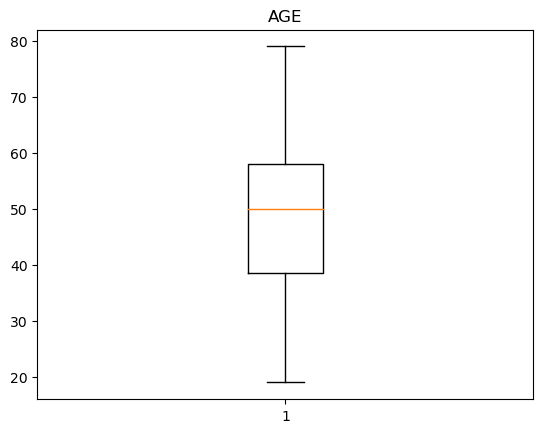

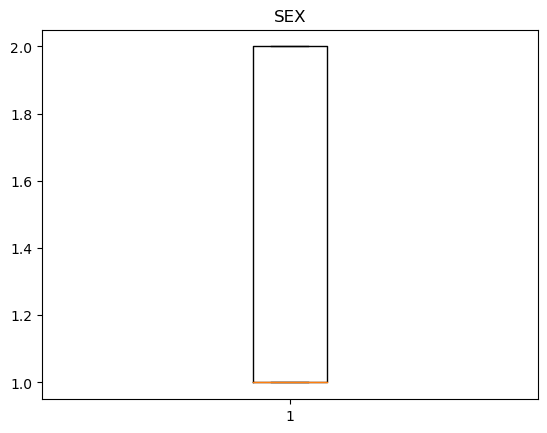

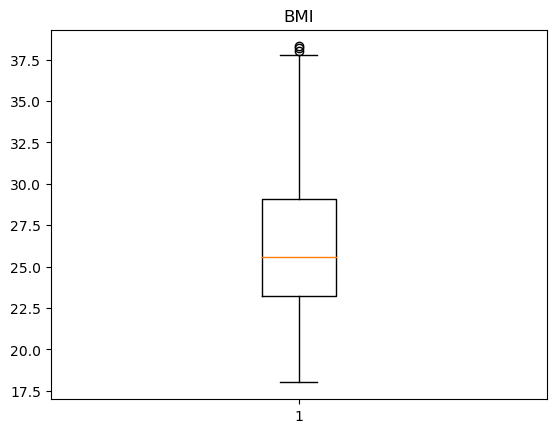

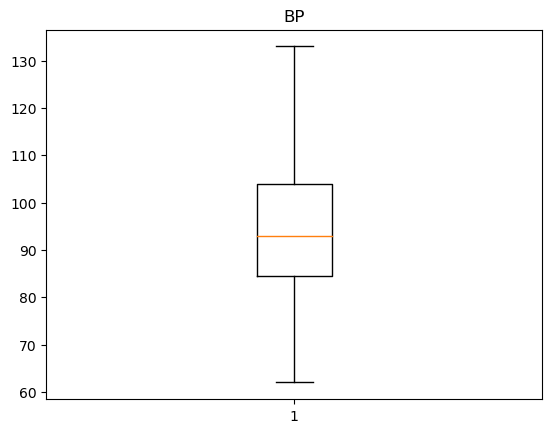

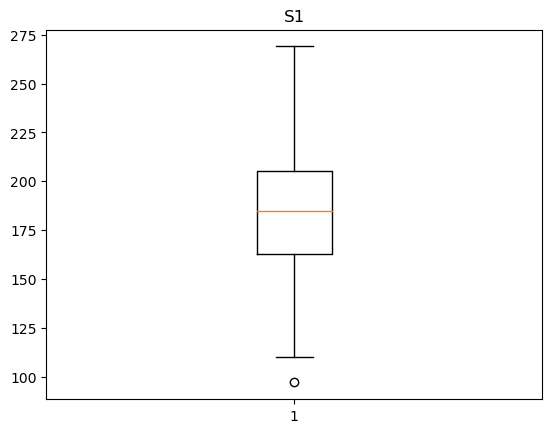

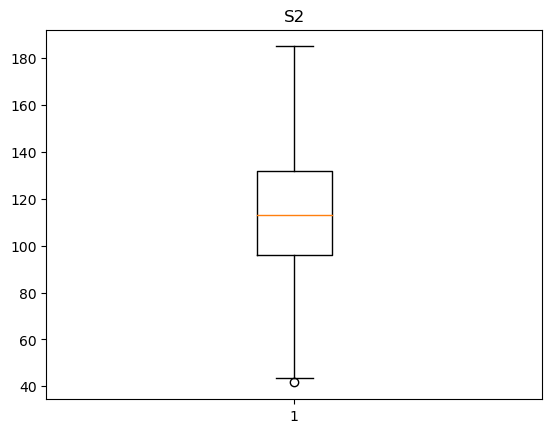

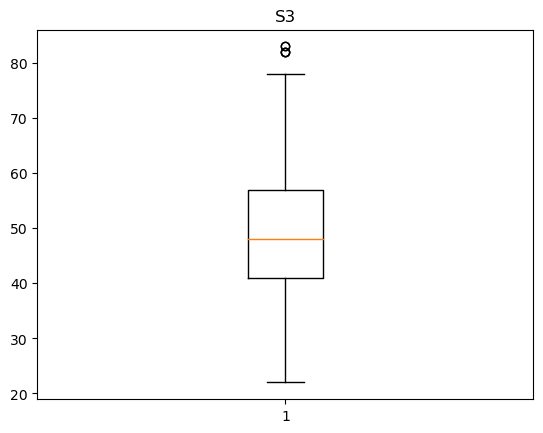

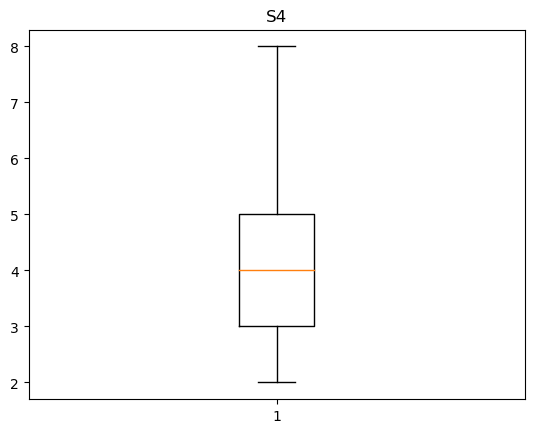

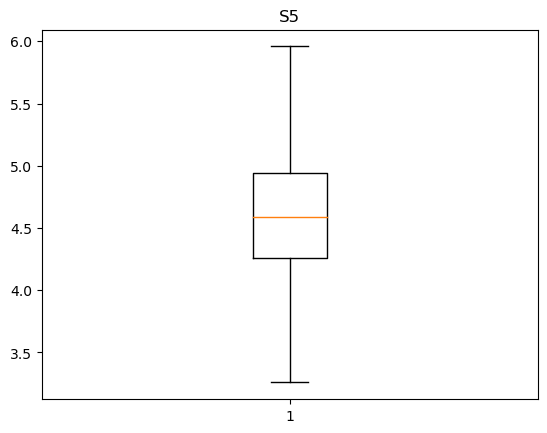

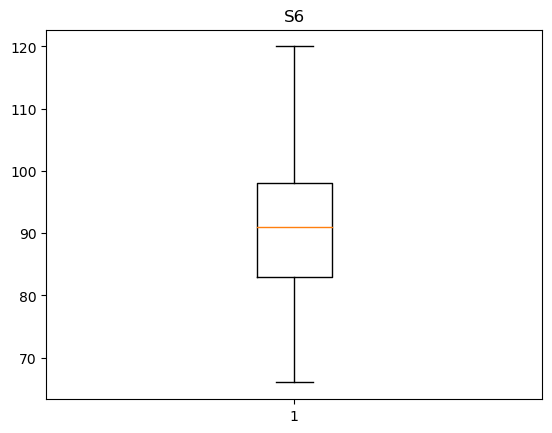

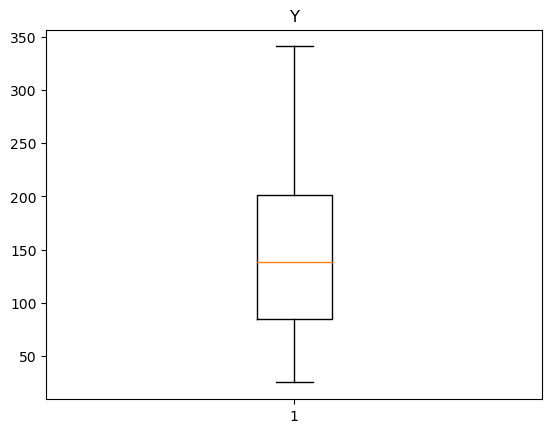

In [7]:
# Generating boxplots for numerical columns in the dataframe
for column in df.columns:
    # Checking if the data type of the column is not 'object' (i.e., it is numerical)
    if df[column].dtype != 'object':
        # Creating a boxplot for the column
        fig, ax = plt.subplots()
        ax.boxplot(df[column])
        ax.set_title(column)
        plt.show()


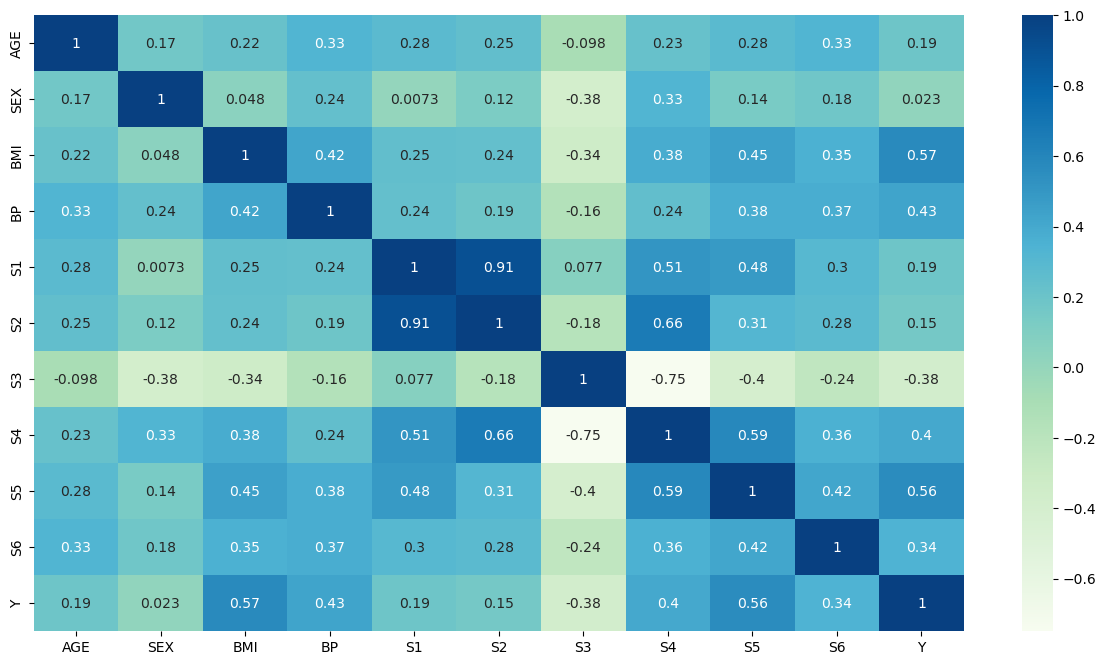

In [8]:
# Generating a correlation matrix for the dataframe
corr_matrix = df.corr()

# Creating a heatmap visualization of the correlation matrix
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap="GnBu")
plt.show()

# Task 1: Predict the feature 'y' using a single feature of 'X' (in the entire dataset)

In [10]:
# Creating a copy of the dataframe and removing the last column ('y')
x = df.copy()
x.drop(x.columns[-1], axis=1, inplace=True)

# Displaying the modified dataframe containing only the features ('X')
x

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
436,33,1,19.5,80.00,171,85.4,75.0,2.00,3.9703,80
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95


In [11]:
# Extracting the target variable 'y' from the dataframe

# Using iloc to select all rows and the last column of the dataframe
y = df.iloc[:, -1:]

# Displaying the target variable 'y'
y

,Y
0,151
1,75
2,141
3,206
4,135
...,...
436,48
437,178
438,104
439,132


In [12]:
#Calculating the correlation between each feature and the target variable 'Y', and sorting the values in descending order
# Using the corrwith method to calculate the correlation between each feature and the target variable 'Y'
corr = df.corrwith(df["Y"])

# Sorting the correlation values in descending order
corr_sorted = corr.sort_values(ascending=False)

corr_sorted

Y      1.000000
BMI    0.574610
S5     0.557329
BP     0.430632
S4     0.402010
S6     0.340406
AGE    0.193537
S1     0.192543
S2     0.153082
SEX    0.022752
S3    -0.375491
dtype: float64

In [13]:
# Selecting the feature 'BMI' as the single feature for predicting the target variable 'Y'

# Using bracket notation to select the 'BMI' column from the dataframe
x = x['BMI']

x

0      32.1
1      21.6
2      30.5
3      25.3
4      23.0
       ... 
436    19.5
437    28.2
438    24.9
439    24.9
440    30.0
Name: BMI, Length: 407, dtype: float64

In [14]:
# Importing the necessary modules for building and evaluating a linear regression model
# Importing the train_test_split method from the model_selection module for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing the LinearRegression class from the linear_model module for building the linear regression model
from sklearn.linear_model import LinearRegression

# Importing the metrics module for evaluating the model performance
import sklearn.metrics as metrics

# Importing the mean_squared_error method from the metrics module for calculating the cost function of the model
from sklearn.metrics import mean_squared_error


In [15]:
# Splitting the dataset into training and testing sets using a 70/30 split ratio
# Using the train_test_split method to split the feature and target variables into training and testing sets, with a 30% split ratio for the testing set
# A random state is set for reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train=y_train.values.reshape(-1,1)


In [16]:
# Initializing the Linear Regression model
model = LinearRegression()

'''Fitting the Multiple Linear Regression model to the data.
The fit method is used to train the model on the training data.
The feature variables (x_train) and target variables (y_train) are passed as arguments to the fit method.'''
model.fit(x_train, y_train)


LinearRegression()

In [17]:
# Printing the coefficients and intercept of the linear regression model
# The coef_ attribute returns an array of slope coefficients for each feature variable
print("Slope Coefficients: ", model.coef_)

# The intercept_ attribute returns the y-intercept of the regression line
print("\nY Intercept: ", model.intercept_)

Slope Coefficients:  [[9.69361107]]

Y Intercept:  [-103.19324511]


In [18]:
# Predicting the target values of the test set using the trained model
y_pred = model.predict(x_test)

# Calculating the mean squared error (MSE) between the predicted and actual values of y
# The mean_squared_error function from sklearn.metrics calculates the MSE
mse_task1 = float(format(metrics.mean_squared_error(y_test, y_pred)))
print("MSE: ",mse_task1)

MSE:  4072.578275731056


In [19]:
from sklearn.metrics import r2_score

# Calculating the R-squared score of the model
# The r2_score function takes the true y-values and predicted y-values as input
r2_task1 = r2_score(y_test, y_pred)
print("R-squared score:", r2_task1)

R-squared score: 0.35826634472653285


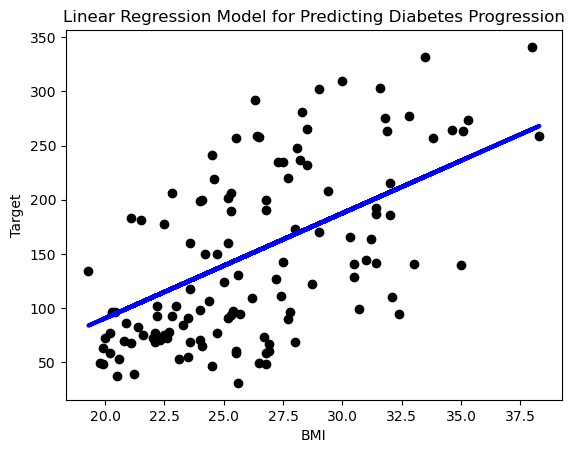

In [20]:
# Plotting the Linear Regression Model
# Scatter plot of the test data with actual y-values as black dots
plt.scatter(x_test, y_test, color='black')
# Plotting the predicted y-values as a blue line
plt.plot(x_test, y_pred, color='blue', linewidth=3)
# Adding labels to the x and y axes
plt.xlabel('BMI')
plt.ylabel('Target')
# Adding a title to the plot
plt.title('Linear Regression Model for Predicting Diabetes Progression')
plt.show()

# Task 2: Predict the feature ‘y’ using a pair feature of ‘X’ (in the entire dataset)

In [21]:

# Make a copy of the dataframe and drop the target feature
x = df.copy()
x.drop(x.columns[-1], axis=1, inplace=True)

# Show the new x dataframe with the target feature removed
x

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
436,33,1,19.5,80.00,171,85.4,75.0,2.00,3.9703,80
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95


In [22]:
y

,Y
0,151
1,75
2,141
3,206
4,135
...,...
436,48
437,178
438,104
439,132


In [23]:
# Calculating the correlation between all features and target variable 'Y'
corr = df.corrwith(df["Y"])

# Sorting the correlation values in descending order
corr_sorted = corr.sort_values(ascending=False)

# Displaying the correlation of all features with the target variable 'Y'
print(corr_sorted)


Y      1.000000
BMI    0.574610
S5     0.557329
BP     0.430632
S4     0.402010
S6     0.340406
AGE    0.193537
S1     0.192543
S2     0.153082
SEX    0.022752
S3    -0.375491
dtype: float64


In [24]:
# Selecting only two features 'BMI' and 'S5' from the x dataframe
x = x[['BMI', 'S5']]

# Displaying the new x dataframe with only the selected features
x

,BMI,S5
0,32.1,4.8598
1,21.6,3.8918
2,30.5,4.6728
3,25.3,4.8903
4,23.0,4.2905
...,...,...
436,19.5,3.9703
437,28.2,4.9836
438,24.9,4.4427
439,24.9,4.1271


In [25]:
# Splitting the dataset into training and testing set (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

'''The train_test_split function from scikit-learn is used to split the input data x and labels y
into two sets each: a training set x_train and y_train and a testing set x_test and y_test.
The test_size parameter specifies the proportion of the data to be used for testing (in this case, 30%).
The random_state parameter sets the seed for the random number generator, ensuring that the same
split is obtained each time the code is run.'''
x_train = x_train.values.reshape(-1, 2)
x_test = x_test.values.reshape(-1, 2) 

In [26]:
# Initializing the Linear Regression model
model = LinearRegression()

# The LinearRegression class from scikit-learn is used to initialize a linear regression model.
# This model assumes a linear relationship between the input variables and the output variable, and
# aims to find the best linear approximation to the data.

# Fitting the Multiple Linear Regression model to the data
model.fit(x_train, y_train)

LinearRegression()

The fit method of the linear regression model is called with the training data as inputs.
This method fits the model to the training data by adjusting the coefficients of the linear function
to minimize the difference between the predicted output and the actual output.
After the model has been fit to the training data, it can be used to make predictions on new data.


In [27]:
# Printing the slope coefficients
print("Slope Coefficients: ", model.coef_)

'''The coef_ attribute of the linear regression model contains the coefficients (slopes) of the
linear function that was fit to the data. In this case, since it is a multiple linear regression
model with two input variables, there are two slope coefficients.'''

# Printing the y-intercept
print("\nY Intercept: ", model.intercept_)

'''The intercept_ attribute of the linear regression model contains the intercept (y-intercept) of
the linear function that was fit to the data. This is the value of the output variable when all
input variables are equal to zero.'''


Slope Coefficients:  [[ 6.80706659 53.50473044]]

Y Intercept:  [-275.15114899]


'The intercept_ attribute of the linear regression model contains the intercept (y-intercept) of\nthe linear function that was fit to the data. This is the value of the output variable when all\ninput variables are equal to zero.'

In [28]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# The predict method of the linear regression model is used to make predictions on the testing data.
# This method takes the input variables as input and returns the predicted output variable.

# RMSE (Root Mean Square Error) as the cost function
mse_task2 = float(format(metrics.mean_squared_error(y_test, y_pred)))
print("MSE: ",mse_task2)

MSE:  3222.696697035541


The mean_squared_error function from scikit-learn's metrics module is used to compute the mean squared error between the predicted values y_pred and the actual values y_test. The mean squared error is a common measure of the quality of a regression model, and represents the average
squared difference between the predicted and actual values.
The format and float functions are used to convert the mean squared error to a float with a specified number of decimal places, for easier readability. The resulting value is printed to the console.

In [29]:
# Importing the r2_score function from scikit-learn's `metrics` module
from sklearn.metrics import r2_score

# Calculating the R^2 score
r2_task2 = r2_score(y_test, y_pred)
print("R-squared score:", r2_task2)

'''The r2_score function from scikit-learn's metrics module is used to compute the R^2 score, which is a measure of how well the linear regression model fits the data. The R^2 score is a value between
0 and 1, with higher values indicating a better fit. The R^2 score is calculated as the ratio of the
variance explained by the model to the total variance of the data.'''


R-squared score: 0.49218583629184964


"The r2_score function from scikit-learn's metrics module is used to compute the R^2 score, which is a measure of how well the linear regression model fits the data. The R^2 score is a value between\n0 and 1, with higher values indicating a better fit. The R^2 score is calculated as the ratio of the\nvariance explained by the model to the total variance of the data."

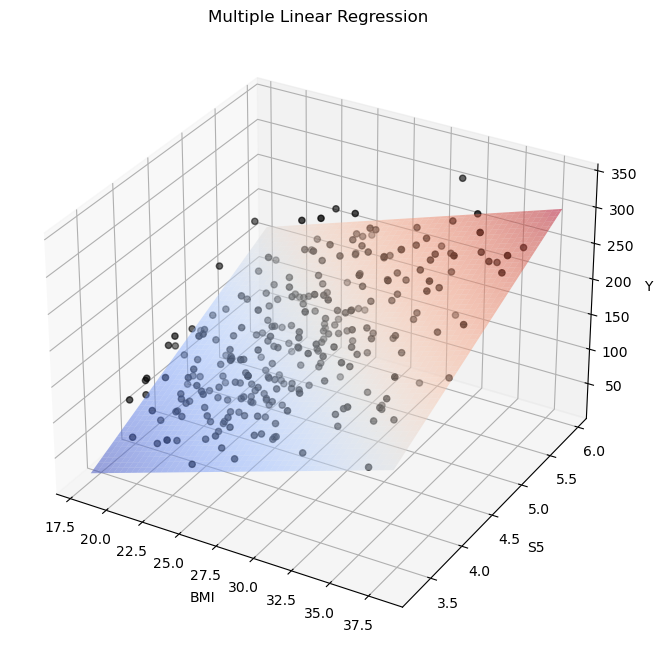

In [30]:
# Fit a linear regression model to the training data
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

# Generate a grid of points to evaluate the model
import numpy as np
x1, x2 = np.meshgrid(np.linspace(x_train[:,0].min(), x_train[:,0].max(), 100),
                     np.linspace(x_train[:,1].min(), x_train[:,1].max(), 100))
X_test = np.column_stack((x1.flatten(), x2.flatten()))

# Predict the values on the grid and reshape them
y_pred = reg.predict(X_test).reshape(x1.shape)

# Create a 3D plot of the regression plane and training data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c='black', marker='o')
ax.plot_surface(x1, x2, y_pred, cmap='coolwarm', alpha=0.5)
ax.set_xlabel('BMI')
ax.set_ylabel('S5')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')
plt.show()
# The scatter method of the axis object is used to create a 3D scatter plot of the training data.
# The x_train[:, 0] and x_train[:, 1] expressions extract the values of the two input variables (BMI and S5) from the training data. 
# The y_train expression extracts the values of the output variable (Y) from the training data.

# Task 3: Predict the feature ‘y’ using all (10) features of ‘X’ (in the entire dataset)

In [31]:

# Create a copy of the dataset
x = df.copy()

# Drop the last column (the output variable)
x.drop(x.columns[-1], axis=1, inplace=True)

The copy method of the pandas DataFrame object is used to create a copy of the original dataset.
The drop method is used to remove the last column (the output variable) from the copy. The axis=1 argument specifies that the column should be dropped (as opposed to a row, which would be specified with axis=0. The inplace=True argument specifies that the changes should be made to the DataFrame in place (as opposed to creating a new copy). The modified DataFrame is stored in the x variable.

In [32]:
y

,Y
0,151
1,75
2,141
3,206
4,135
...,...
436,48
437,178
438,104
439,132


In [33]:
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

The train_test_split function from the model_selection module of scikit-learn is used to split the dataset into training and testing sets. The x variable contains the input features, and the y variable contains the output variable. The test_size argument is set to 0.3, indicating that 30% of the data should be reserved for testing. The random_state argument is set to 28, which ensures that the same random split is obtained each time the code is run. The function returns four arrays: x_train, x_test, y_train, and y_test. The x_train and y_train arrays contain the input features and output variable for the training set, and the x_test and y_test arrays contain the input features and output variable for the testing set.


In [34]:
# Import the necessary library
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

The LinearRegression class from the linear_model module of scikit-learn is used to create an instance of the linear regression model. The model is stored in the model variable. The fit method of the model is used to fit the model to the training data. The x_train and y_train variables contain the input features and output variable for the training set, respectively. The fit method adjusts the coefficients of the linear regression model to minimize the sum of squared errors between the predicted output and the actual output. The fitted model is stored in the model variable.


In [35]:
# Print the coefficients and intercept of the linear regression model
print("Slope Coefficients:", model.coef_)
print("\nY Intercept:", model.intercept_)

Slope Coefficients: [[-1.36304977e-02 -2.52750489e+01  5.00954132e+00  1.16984130e+00
  -2.95473925e-01  5.06737708e-02 -5.73100761e-01  1.97821528e+00
   4.86799381e+01  4.53337035e-01]]

Y Intercept: [-250.41894583]


The coef_ attribute of the linear regression model stores the coefficients of the input features. These coefficients represent the change in the output variable for a unit change in the corresponding input feature, while keeping all other features constant. The intercept_ attribute stores the intercept term of the linear regression model, which represents the expected output value when all input features are zero. The code above simply prints out the slope coefficients and intercept of the model.


In [36]:
# Import the necessary libraries
from sklearn import metrics

# Use the trained model to predict the output variable of the test set
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE) between the predicted output and the actual output
mse_task3 = float(format(metrics.mean_squared_error(y_test, y_pred), '.2f'))

# Print the MSE
print("MSE:",mse_task3)

MSE: 3042.0


The predict method of the linear regression model is used to predict the output variable of the test set given the input features in x_test. The predicted output values are stored in the y_pred variable. The mean_squared_error function from the metrics module of scikit-learn is used to calculate the MSE between the predicted output and the actual output (y_test). The calculated MSE is stored in the mse variable. Finally, the code above prints out the MSE.

In [37]:
# Import the necessary libraries
from sklearn.metrics import r2_score

# Use the trained model to predict the output variable of the test set
y_pred = model.predict(x_test)

# Calculate the R-squared (coefficient of determination) score between the predicted output
# and the actual output of the test set
r2_task3 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r2_task3)

R-squared score: 0.5206594210297592


The r2_score function from the metrics module of scikit-learn is used to calculate the R-squared (coefficient of determination) score between the predicted output and the actual output (y_test) of the test set. The calculated R-squared score is stored in the r2 variable. Finally, the code above prints out the R-squared score.

In [38]:
# Creating a dictionary of the task results
results = {"Task": ["Task 1", "Task 2", "Task 3"],
           "MSE": [mse_task1, mse_task2, mse_task3],
           "R2 Score": [r2_task1, r2_task2, r2_task3]}

# Creating a pandas DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Displaying the DataFrame
results_df

,Task,MSE,R2 Score
0,Task 1,4072.578276,0.358266
1,Task 2,3222.696697,0.492186
2,Task 3,3042.000000,0.520659


# Task 4: Compute the training MSE and validation MSE when fitting the regressor in all features, for the following training set sizes


Training MSE for n_train = 20: 966.49
Validation MSE for n_train = 20: 9779.83

Training MSE for n_train = 50: 2599.73
Validation MSE for n_train = 50: 3578.66

Training MSE for n_train = 100: 2554.19
Validation MSE for n_train = 100: 3438.10

Training MSE for n_train = 200: 2864.74
Validation MSE for n_train = 200: 3014.16



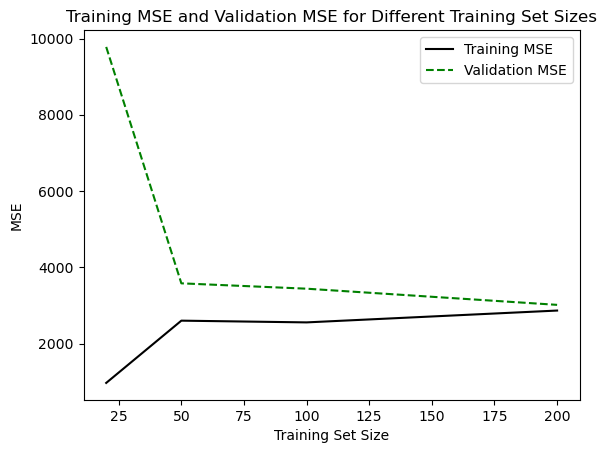

In [66]:
# Initializing empty lists to store the training and validation MSE for each training set size
train_mse_list = []
val_mse_list = []

# Looping through different training set sizes
for n_train in [20, 50, 100, 200]:
    
    # Splitting the data into training and testing sets using the specified training set size
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=n_train)
    
    # Selecting only the first n_train instances from the training set
    X_train = X_train[:n_train]
    y_train = y_train[:n_train]
    
    # Initializing a new Linear Regression model
    lin_reg = LinearRegression()
    
    # Fitting the model to the training data
    lin_reg.fit(X_train, y_train)
    
    # Predicting the target values for the training and validation sets
    y_train_pred = lin_reg.predict(X_train)
    y_val_pred = lin_reg.predict(X_test)
    
    # Calculating the mean squared error for the training and validation sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_test, y_val_pred)
    
    # Appending the MSE values to the respective lists
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)
    
    # Printing the training and validation MSE for the current training set size
    print("Training MSE for n_train = {}: {:.2f}".format(n_train, train_mse))
    print("Validation MSE for n_train = {}: {:.2f}\n".format(n_train, val_mse))

# Plotting the training MSE and validation MSE for different training set sizes
fig, ax = plt.subplots()
ax.plot([20, 50, 100, 200], train_mse_list, color='black', label='Training MSE')
ax.plot([20, 50, 100, 200], val_mse_list, color='green', linestyle='dashed', label='Validation MSE')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('MSE')
ax.set_title('Training MSE and Validation MSE for Different Training Set Sizes')
ax.legend()
plt.show()

# Extra Credit Task: Create another model by using the XGBoost library. Compare and contrast its results with the linear regressor (tasks 1-4).


Mean Squared Error (XGBoost): 3674.070689036629


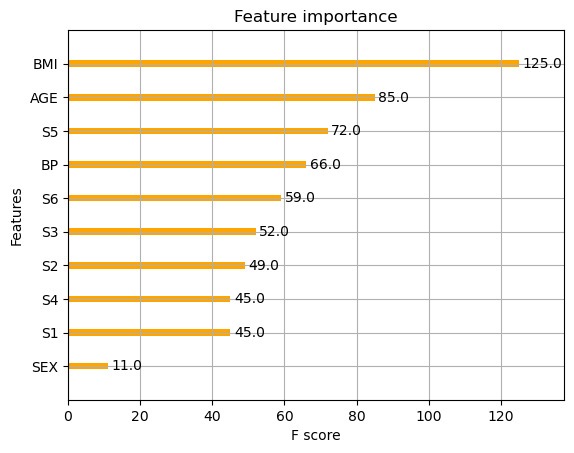

In [68]:
import xgboost as xgb
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 100, random_state = 4)
# Convert the data to DMatrix format for use with XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror', # Regression task with squared error
    'eval_metric': 'rmse', # Evaluation metric is root mean squared error
    'eta': 0.1, # Learning rate (eta)
    'max_depth': 3 # Maximum depth of the tree
}

# Train the XGBoost model
xg_reg = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the testing set using the trained XGBoost model
y_pred = xg_reg.predict(dtest)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (XGBoost):", mse)

# Plot the feature importance using the XGBoost model
xgb.plot_importance(xg_reg, color='orange')
plt.show()

We are training an XGBoost model on the same data used in tasks 1-4. We set the parameters of the model and train it using the training data. We then use the trained model to make predictions on the testing set. calculate the mean squared error of the predictions. Finally, we plot the feature importance using the XGBoost model to see which features are most important in predicting the target variable.

In comparison to the linear regression model, the XGBoost model might perform better if the dataset has complex relationships between the features and the target. The XGBoost model can handle non-linear relationships and interactions between the features, whereas the linear regression model assumes a linear relationship. However, the XGBoost model may also be more computationally expensive to train and tune. In this specific case, we would need to perform further analysis and experimentation to determine which model performs better for predicting the progression of diabetes.

Summary:

We have implemented a Linear Regression model in Python using the Scikit-learn module to predict the progression of diabetes using the least-squares regression.
We have used the diabetes dataset from Stanford U’s Machine Learning Repository.
We have performed three tasks to predict the feature 'y' using different combinations of 'x' features and evaluated the performance of the model using Mean Squared Error.
We have also computed the training and validation MSE for different training set sizes and plotted the results.
Finally, we have implemented an XGBoost model and compared its results with the linear regression model.
Overall, we have demonstrated how to implement and evaluate a Linear Regression model in Python using Scikit-learn and how to compare it with an XGBoost model.